In [2]:
import numpy as np
from pywt import wavedec
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import  graphviz_layout
import networkx as nx
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 10]     


def genData(param, show = False):
	a=[]
	if param[0]=="normal":
		mu, sigma, s = param[1],   param[2], param[3]
		a= np.random.normal(mu, sigma, size=s)
	elif param[0]=='uniform':
		mi, ma,s=param[1],   param[2], param[3]
		a= np.random.uniform(mi, ma, s)
	elif param[0]=="poisson":
		rate,s=param[1],   param[2]
		a = np.random.poisson(rate, s)
	if(show):
		count, bins, ignored = plt.hist(s, 14, density=True)
	return a
def decodeTrainOperations(all,cikti=False):
    sonuc = ""
    for i in range(len(all)):
        print(i, end="\t")
        a = all[i]
        
        if(int(a[1])%4==0   ):
            print(int(a[0]) , "+", int(a[2]) ,"=", int(a[0])  + int(a[2]))
            if cikti:
                sonuc = str(a[0])+"+"+str(a[2])+"="+str( int(a[0])  + int(a[2]))
                return sonuc
       
        elif(int(a[1])%4==1  ):            
            print(int(a[0]) , "-", int(a[2]) ,"=", int(int(a[0])  - int(a[2])))            
        
        elif(int(a[1])%4==2   ):
            print(int(a[0]) , "*", int(a[2]) ,"=", int(a[0])  * int(a[2]))
                    
        elif(int(a[1])%4==3 ):            
            print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
           
        
def getSamplePredef():
    print("return sample data")
    signals = [[105, 220, 23, 99, 266, 190, 37, 5],
                [334, 174, 134, -7, 19, 155, 93, 89],
                [72, 96, 102, 151, -14, 171, 127, 127],
                [15, 38, 283, 204, 232, 141, 121, 47],
                [157, -60, 54, 54, 69, -27, -14, 101],
                [0, 113, 74, 176, 68, 322, 135, 367],
                [56, 114, 126, 181, 93, 41, 118, 76],
                [164, 200, 351, 51, 36, 163, 298, -5],
                [140, 124, 99, 34, -46, -5, 240, 136],
                [113, 58, 130, 123, 171, 143, 109, 17],
                [-8, 299, 65, 62, 130, 146, -43, 23],
                [-96, 212, 56, 150, -55, 150, 151, 70],
                [-22, 148, 219, 62, 108, 136, 198, 126],
                [220, 84, 165, 167, 1, 227, 15, 144],
                [200, 135, 165, 64, 100, 224, 244, 140],
                [21, 183, -161, 65, 33, 257, -16, 112]]
    return signals

In [14]:
def generateOperationsSymbols(operations_count, symbol_list, Test = False, verbose= False):
    ops_ids=[]
    symbolSet = []
    
    for i in range(operations_count):
        if(verbose):print(i, end="\t")
        a = genData(["uniform", 0,10,4])    
        a= [int(x) for x in a]
        if(Test):
            a[3]=0
        go = True        
        #a=[4, 5, 9, -5]
        a[1]=a[1]%2
        a[1]=0
        rez = 0
        
        
        if(int(a[1])%4==0   ): # operation is + 
            if ( a[0] + a[2] > 9 ):
                go = False
            else :
                rez = a[0] + a[2]
        elif(int(a[1])%4==1   ): # operation is -
            if a[0] < a[2]  :
                go = False                
            else :
                #print("here", a[0] - a[2] , a[0] > a[2])
                rez = a[0] - a[2]
        elif(int(a[1])%4==2   ): # operation is *
            if ( a[0] * a[2] >9  ):
                go = False
            else :                
                rez = a[0] * a[2]               
        elif(int(a[1])%4==3   ): # operation is -
            if ( a[2] ==0 ):                
                go = False
            else :
                rez = int(a[0] / a[2])
        #rint(go)  
        
        if(a[0] > 5 or a[2]>5  or (a[0]==1 and a[2]==3) or (a[0]==2 and a[2]==3) ):
            go=False
        
        if go:
            if verbose : print(go , rez)
            a[3]=rez
            ops_ids.append(a)
            symbolSet.append(symbol_list[a[0]] )
            symbolSet.append(symbol_list[a[1]%4+10] )
            symbolSet.append(symbol_list[a[2]] )
            symbolSet.append(symbol_list[14] )
            if(not Test):
                symbolSet.append(symbol_list[a[3]] )
            else:
                symbolSet.append(symbol_list[15] )
    return ops_ids, symbolSet

In [15]:
a= getSamplePredef()
b=[]
for i in a:
    b.append([])
    for j in i:
        b[-1].append(int(j<100))
for i in b:
    print(i)
c=np.array(b)     

print()
print("Similarity Matrix")

n_signals = len(a)
max_corr=np.zeros([n_signals,n_signals])
for first in range(n_signals):
    for second in range(first + 1, n_signals):
        #corr = np.correlate(c[first], c[second], mode='full')
        #max_corr[first, second] = np.max(corr)
        max_corr[first][second] = int(sum(abs((c[first]-c[second]))))
        max_corr[second] [first] = int(sum(abs((c[first]-c[second]))))
import matplotlib.pyplot as plt
print(max_corr)
#plt.imshow(max_corr)        

return sample data
[0, 0, 1, 1, 0, 0, 1, 1]
[0, 0, 0, 1, 1, 0, 1, 1]
[1, 1, 0, 0, 1, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 1]
[0, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 1, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 1, 1, 0, 0, 1]
[0, 0, 1, 1, 1, 1, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 1]
[1, 0, 1, 1, 0, 0, 1, 1]
[1, 0, 1, 0, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0]

Similarity Matrix
[[0. 2. 7. 5. 4. 5. 6. 3. 4. 4. 1. 4. 4. 5. 3. 3.]
 [2. 0. 5. 5. 4. 5. 4. 1. 4. 4. 3. 4. 4. 3. 3. 3.]
 [7. 5. 0. 2. 5. 2. 3. 4. 5. 3. 6. 3. 3. 2. 4. 4.]
 [5. 5. 2. 0. 7. 4. 3. 4. 7. 1. 4. 3. 3. 4. 4. 6.]
 [4. 4. 5. 7. 0. 5. 6. 5. 2. 6. 5. 6. 6. 3. 5. 3.]
 [5. 5. 2. 4. 5. 0. 3. 4. 3. 5. 4. 1. 3. 4. 4. 2.]
 [6. 4. 3. 3. 6. 3. 0. 3. 4. 4. 5. 2. 4. 5. 5. 5.]
 [3. 1. 4. 4. 5. 4. 3. 0. 3. 3. 4. 3. 3. 4. 2. 4.]
 [4. 4. 5. 7. 2. 3. 4. 3. 0. 6. 5. 4. 4. 5. 3. 3.]
 [4. 4. 3. 1. 6. 5. 4. 3. 6. 0. 5. 4. 4. 3. 3. 7.]
 [1. 3. 6. 4. 5. 4. 5. 4. 5. 5. 0. 3. 3. 6. 4. 2.]
 

In [16]:
verbose = True
op_count = 2000
symbols = c
symbols_correspondence = ["0","1","2","3","4","5","6","7","8","9","+", "-","*", "/","=","?"]
if (verbose):
    print("symbols")
    [print(i, symbols_correspondence[i], symbols[i]) for i in range(len(symbols))]
    print()
    
a,b=generateOperationsSymbols(op_count, symbols, False, False)

if (verbose): 
    print("operations encoded ")
    [print(i, a[i]) for i in range(len(a))]
    print() 
    print("operations")
    decodeTrainOperations(a)
    print("operation symbols")
    [print(i, b[i]) for i in range(len(b))]
    print()


symbols
0 0 [0 0 1 1 0 0 1 1]
1 1 [0 0 0 1 1 0 1 1]
2 2 [1 1 0 0 1 0 0 0]
3 3 [1 1 0 0 0 0 0 1]
4 4 [0 1 1 1 1 1 1 0]
5 5 [1 0 1 0 1 0 0 0]
6 6 [1 0 0 0 1 1 0 1]
7 7 [0 0 0 1 1 0 0 1]
8 8 [0 0 1 1 1 1 0 0]
9 9 [0 1 0 0 0 0 0 1]
10 + [1 0 1 1 0 0 1 1]
11 - [1 0 1 0 1 0 0 1]
12 * [1 0 0 1 0 0 0 0]
13 / [0 1 0 0 1 0 1 0]
14 = [0 0 0 1 0 0 0 0]
15 ? [1 0 1 1 1 0 1 0]

operations encoded 
0 [2, 0, 5, 7]
1 [2, 0, 1, 3]
2 [4, 0, 2, 6]
3 [3, 0, 4, 7]
4 [3, 0, 0, 3]
5 [1, 0, 4, 5]
6 [0, 0, 3, 3]
7 [4, 0, 0, 4]
8 [5, 0, 2, 7]
9 [2, 0, 4, 6]
10 [1, 0, 1, 2]
11 [0, 0, 0, 0]
12 [3, 0, 2, 5]
13 [2, 0, 4, 6]
14 [0, 0, 4, 4]
15 [4, 0, 2, 6]
16 [0, 0, 5, 5]
17 [3, 0, 2, 5]
18 [4, 0, 5, 9]
19 [1, 0, 0, 1]
20 [0, 0, 5, 5]
21 [5, 0, 1, 6]
22 [4, 0, 2, 6]
23 [1, 0, 2, 3]
24 [0, 0, 5, 5]
25 [5, 0, 3, 8]
26 [2, 0, 0, 2]
27 [4, 0, 0, 4]
28 [4, 0, 5, 9]
29 [5, 0, 4, 9]
30 [3, 0, 2, 5]
31 [0, 0, 4, 4]
32 [4, 0, 3, 7]
33 [1, 0, 0, 1]
34 [0, 0, 4, 4]
35 [4, 0, 0, 4]
36 [3, 0, 0, 3]
37 [4, 0, 5, 9]
38 [5, 0, 2, 7]

In [17]:
print("expresion readable ",a)
print()
print("expression as symbols")
for i in range(len(b)):
    print (   b[i])

expresion readable  [[2, 0, 5, 7], [2, 0, 1, 3], [4, 0, 2, 6], [3, 0, 4, 7], [3, 0, 0, 3], [1, 0, 4, 5], [0, 0, 3, 3], [4, 0, 0, 4], [5, 0, 2, 7], [2, 0, 4, 6], [1, 0, 1, 2], [0, 0, 0, 0], [3, 0, 2, 5], [2, 0, 4, 6], [0, 0, 4, 4], [4, 0, 2, 6], [0, 0, 5, 5], [3, 0, 2, 5], [4, 0, 5, 9], [1, 0, 0, 1], [0, 0, 5, 5], [5, 0, 1, 6], [4, 0, 2, 6], [1, 0, 2, 3], [0, 0, 5, 5], [5, 0, 3, 8], [2, 0, 0, 2], [4, 0, 0, 4], [4, 0, 5, 9], [5, 0, 4, 9], [3, 0, 2, 5], [0, 0, 4, 4], [4, 0, 3, 7], [1, 0, 0, 1], [0, 0, 4, 4], [4, 0, 0, 4], [3, 0, 0, 3], [4, 0, 5, 9], [5, 0, 2, 7], [2, 0, 0, 2], [4, 0, 1, 5], [1, 0, 2, 3], [3, 0, 0, 3], [3, 0, 1, 4], [0, 0, 5, 5], [3, 0, 2, 5], [4, 0, 5, 9], [0, 0, 4, 4], [1, 0, 4, 5], [4, 0, 1, 5], [0, 0, 4, 4], [0, 0, 5, 5], [3, 0, 5, 8], [3, 0, 0, 3], [4, 0, 1, 5], [2, 0, 0, 2], [1, 0, 5, 6], [3, 0, 5, 8], [2, 0, 4, 6], [1, 0, 5, 6], [1, 0, 5, 6], [1, 0, 4, 5], [4, 0, 0, 4], [2, 0, 4, 6], [0, 0, 3, 3], [4, 0, 0, 4], [1, 0, 1, 2], [3, 0, 3, 6], [4, 0, 4, 8], [4, 0, 1, 5],

# Input Data

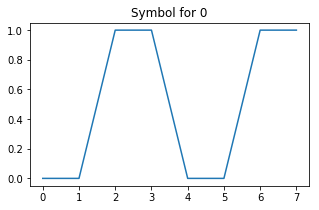

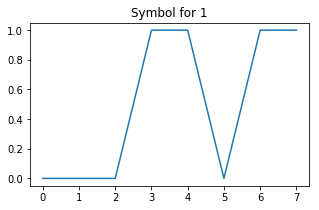

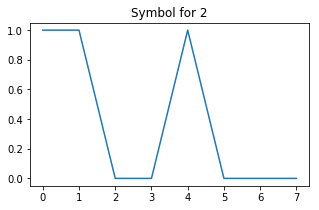

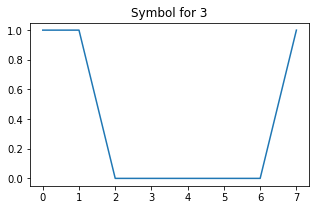

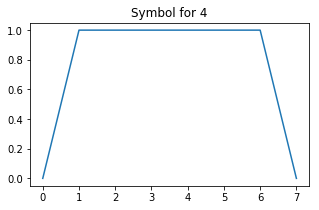

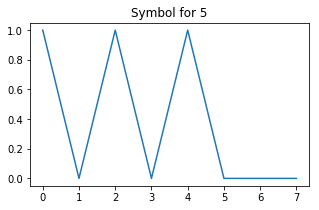

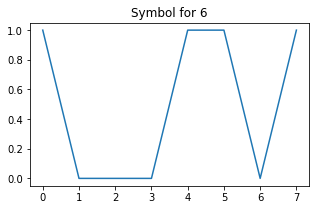

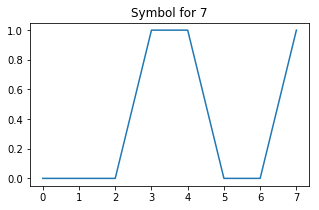

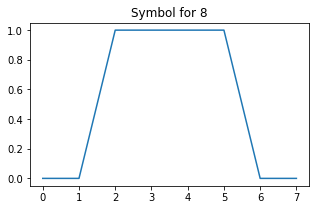

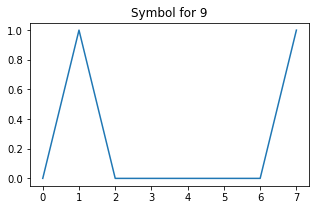

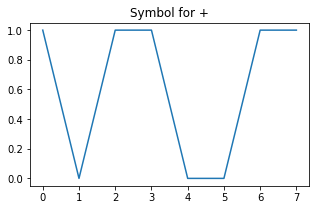

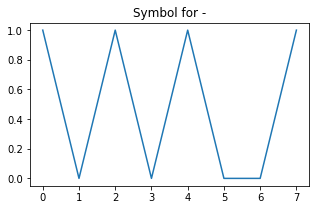

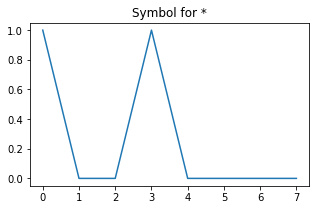

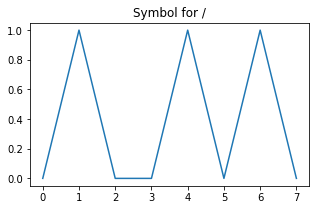

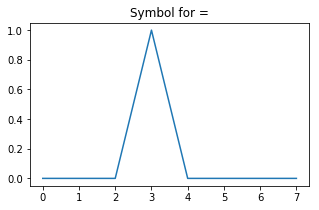

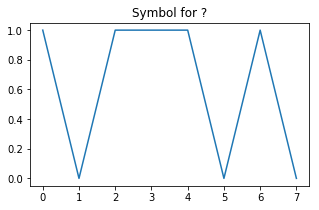

0	2 + 5 = 7


Text(0.5, 1.0, 'Sample Opperation2+5=7')

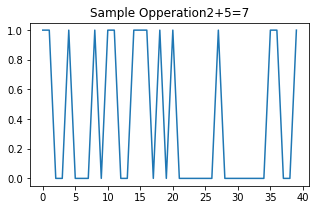

In [18]:
plt.rcParams['figure.figsize'] = [5, 3]     
for i in range(16):
    plt.plot(symbols[i])
    plt.title("Symbol for " + symbols_correspondence[i])
    plt.show()

[(i, a[i]) for i in range(5)]
plt.plot(np.concatenate(b)[:40])
plt.title("Sample Opperation" + decodeTrainOperations(a[:1], True) )

# Input Decode

In [19]:
import os
import sys

sys.path.append(r"C:\serdar\code\taniyanAgac\tani\modules")#"/home/matei/Documents/code/taniyanAgac/agac/modules")

from BaseStructure import BaseStructure

spektron= BaseStructure()

for i in range(16):
    p = spektron.addBranch(symbols[i])
    
    print(p,"Before",spektron.agac.node[p]["id"] )
    if(i<10):
        spektron.agac.node[p]["id"] = i
    else:
        spektron.agac.node[p]["id"] = 100+i
    print("After",spektron.agac.node[p]["id"] )

8 Before -1
After 0
14 Before -1
After 1
22 Before -1
After 2
26 Before -1
After 3
33 Before -1
After 4
40 Before -1
After 5
46 Before -1
After 6
48 Before -1
After 7
52 Before -1
After 8
58 Before -1
After 9
63 Before -1
After 110
64 Before -1
After 111
69 Before -1
After 112
73 Before -1
After 113
77 Before -1
After 114
81 Before -1
After 115


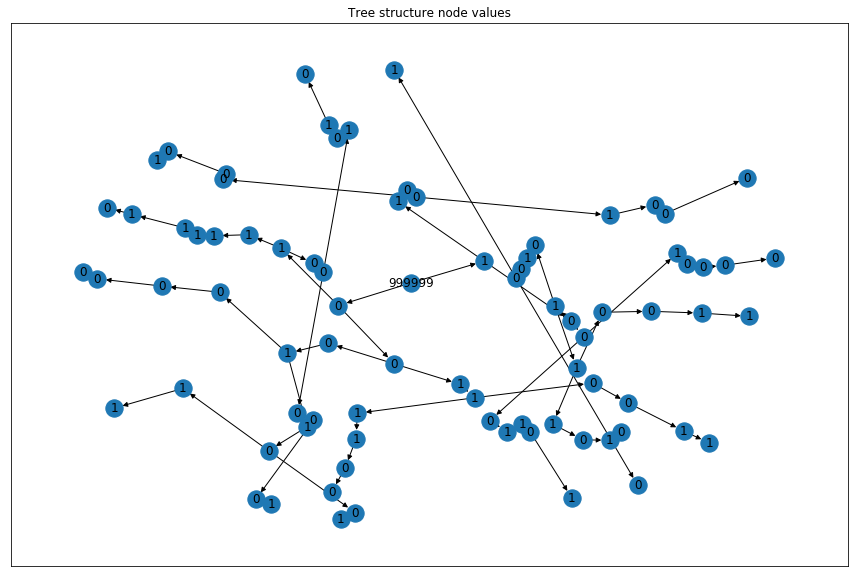

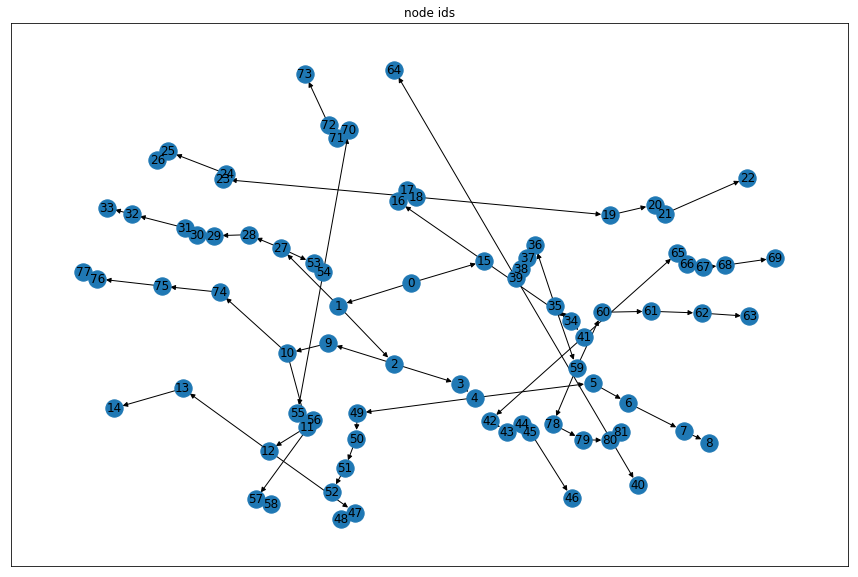

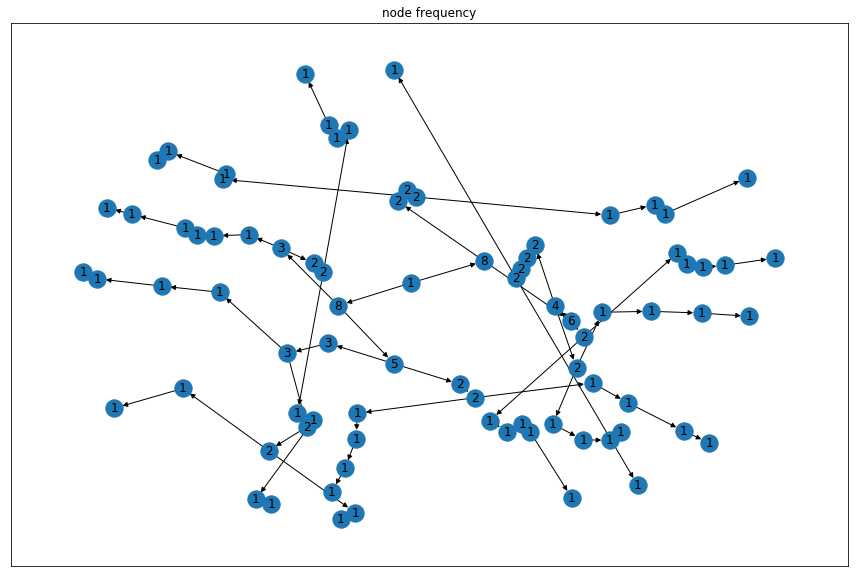

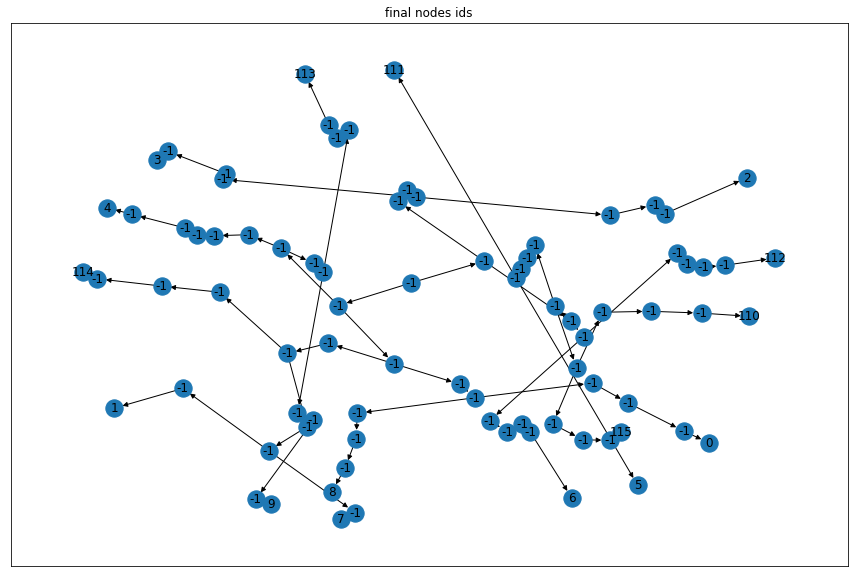

In [20]:
spektron.plotGraph()

# Symbol Buffer for Expression Building

In [8]:

#for i in range(len(b)):
print ("All symbols = ",len(b))   

print ( "All expressions =" , len(b)/5)   
print("One Symbols's length",len(b[0]), b[0])
    
print(np.concatenate(b)[:40])
nodeID = spektron.checkBranch(b[0])
print ( "ID of first symbol in first expression ", nodeID, spektron.agac.node[nodeID] )


All symbols =  3310
All expressions = 662.0
One Symbols's length 8 [1 1 0 0 0 0 0 1]
[1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1
 1 1 0]
ID of first symbol in first expression  26 {'value': 1, 'occurance_count': 1, 'id': 3}


# Learning tree

In [10]:
rules = []
sym = []
for i in symbols:
    sym.append(list(i))

for i in range(10):
    for j in range(2):
        if(i+j<10):
            rules.append(sym[i])
            rules.append(sym[10])
            rules.append(sym[j])
            rules.append(sym[14])
            rules.append(sym[i+j])
        
print(rules[:10])        

#initialize
ilk_katman = []
ikinci_katman = [] 
ucuncu_katman=[]

expression_as_signal = rules;

[[0, 0, 1, 1, 0, 0, 1, 1], [1, 0, 1, 1, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, 1, 1], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, 1, 1], [1, 0, 1, 1, 0, 0, 1, 1], [0, 0, 0, 1, 1, 0, 1, 1], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 1, 1]]


In [11]:



#plt.plot(np.concatenate(b)[:40])
for i in range(len(expression_as_signal)):
    if not (list(expression_as_signal[i]) in ilk_katman):
        ilk_katman.append(list(expression_as_signal[i]))

    

for i in range(len(expression_as_signal)):            
    if(i%5==4):       
        rule = [] 
        for k in range(4, -1, -1):    
            #print(i,k,i-k, expression_as_signal[i-k])
            rule.append(ilk_katman.index( list(expression_as_signal[i-k])))
        if not rule in ikinci_katman:
            ikinci_katman.append(rule)
            
# display ilk katman         
print("first layer branches")
for i in ilk_katman:
    print(symbols_correspondence[ sym.index(i)],end="\t")
    print(i)

    
print("second layer branches")    
for i,k in enumerate(ikinci_katman):
    print(i,k)
    
    
    
    

first layer branches
0	[0, 0, 1, 1, 0, 0, 1, 1]
+	[1, 0, 1, 1, 0, 0, 1, 1]
=	[0, 0, 0, 1, 0, 0, 0, 0]
1	[0, 0, 0, 1, 1, 0, 1, 1]
2	[1, 1, 0, 0, 1, 0, 0, 0]
3	[1, 1, 0, 0, 0, 0, 0, 1]
4	[0, 1, 1, 1, 1, 1, 1, 0]
5	[1, 0, 1, 0, 1, 0, 0, 0]
6	[1, 0, 0, 0, 1, 1, 0, 1]
7	[0, 0, 0, 1, 1, 0, 0, 1]
8	[0, 0, 1, 1, 1, 1, 0, 0]
9	[0, 1, 0, 0, 0, 0, 0, 1]
second layer branches
0 [0, 1, 0, 2, 0]
1 [0, 1, 3, 2, 3]
2 [3, 1, 0, 2, 3]
3 [3, 1, 3, 2, 4]
4 [4, 1, 0, 2, 4]
5 [4, 1, 3, 2, 5]
6 [5, 1, 0, 2, 5]
7 [5, 1, 3, 2, 6]
8 [6, 1, 0, 2, 6]
9 [6, 1, 3, 2, 7]
10 [7, 1, 0, 2, 7]
11 [7, 1, 3, 2, 8]
12 [8, 1, 0, 2, 8]
13 [8, 1, 3, 2, 9]
14 [9, 1, 0, 2, 9]
15 [9, 1, 3, 2, 10]
16 [10, 1, 0, 2, 10]
17 [10, 1, 3, 2, 11]
18 [11, 1, 0, 2, 11]
